In [1]:
# 导入库
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

import ner_functions as nf

import re
import glob
import json

## 定义了一些函数

In [2]:
import pandas as pd

def extract_ner_entities(df):
    """
    Extract named entities, their types, words, and scores from the NER column of the dataframe.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the 'NER_parsed' column with the NER results.

    Returns:
    - entities_df (pd.DataFrame): DataFrame with extracted entities, their types, words, and scores.
    """
    
    entities = []
    entity_words = []
    scores = []

    for ner_list in df['NER'].apply(json.loads):
        for ner in ner_list:
            entities.append(ner['entity'])
            entity_words.append(ner['word'])
            scores.append(ner['score'])

    entities_df = pd.DataFrame({
        'Entity_Type': entities,
        'Entity_Word': entity_words,
        'Score': scores
    })

    return entities_df

def process_entities(ner_results):
    entities = [{'word': d['Entity_Word'], 'entity': d['Entity_Type'], 'score': d['Score']} for index, d in ner_results.iterrows()]
    processed_entities = []
    current_entity = []
    for entity in entities:
        if entity['entity'].startswith('B-') or (entity['entity'].startswith('I-') and not current_entity):
            if current_entity:
                processed_entities.append(current_entity)
            current_entity = [entity]
        elif entity['entity'].startswith('I-') and current_entity:
            current_entity.append(entity)
    if current_entity:
        processed_entities.append(current_entity)

    return processed_entities

# Example usage:
# extracted_df = extract_ner_entities(australia_data)
# processed_results = process_entities(extracted_df)
# for entity_group in processed_results:
#     print(entity_group)


def text_display(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

    # Displaying each sentence on a new line for clarity
    displayed_text = "\n\n".join(sentences)
    print(displayed_text)

# CNN NER结果分析

In [8]:
# 读取数据
cnn_articles_path = '../Data/Articles/ReutersArticles/*.csv'
cnn_ner_path = '../Data/NER_Entity/*.csv'

lst_files = []
for fname in glob.glob(cnn_ner_path):
    lst_files.append(fname)

lst_files = sorted(lst_files)

lst_files_articles = []

for fname in glob.glob(cnn_articles_path):
    lst_files_articles.append(fname)

lst_files_articles = sorted(lst_files_articles)

all_selected_articles = []
# 读取数据
for i in range(0, 1):
    file_ner = lst_files[i]
    file_articles = lst_files_articles[i]
    
    df = pd.read_csv(file_ner, index_col=0)
    df_articles = pd.read_csv(file_articles, index_col=0)
    # 读取文件大小，随机抽选20篇文章
    # Randomly select 20 articles (rows) from the DataFrame
    selected_articles = df.sample(n=20, replace=False) if len(df) >= 20 else df
    
    for index, row in selected_articles.iterrows():
        if row['Headline'] in df_articles['Headline'].values:
            selected_articles.loc[index, 'Text'] = df_articles[df_articles['Headline'] == row['Headline']]['Text'].values[0]
    
    # Append the selected articles to the list
    all_selected_articles.append(selected_articles)

# Concatenate all the selected articles into a single DataFrame
combined_df = pd.concat(all_selected_articles, ignore_index=True)



KeyError: 'Headline'

In [58]:
combined_df

,Date,Headline,Count,NER,Text
0,2018-10-31,Trump claims he can defy Constitution and end ...,0,"[{""entity"": ""B-PER"", ""score"": 0.99924743175506...","President Donald Trump offered a dramatic, if ..."
1,2018-05-25,2 men wanted after blast injures 15 people at ...,0,"[{""entity"": ""B-LOC"", ""score"": 0.99959534406661...",A manhunt is on in Canada after two men detona...
2,2021-11-09,Covid-19 drove deaths up 16% in OECD countries...,0,"[{""entity"": ""B-MISC"", ""score"": 0.9694918990135...",The Covid-19 pandemic caused a 16% rise in exp...
3,2020-05-08,A weak polar vortex will usher in record cold air,0,"[{""entity"": ""B-LOC"", ""score"": 0.99911135435104...",A weak polar vortex will help usher in record ...
4,2022-04-19,The bags look like well-known chips or candies...,0,"[{""entity"": ""B-MISC"", ""score"": 0.7330789566040...","At first glance, it looks like a single servin..."
5,2018-03-02,Republican governor asks Trump to reconsider t...,0,"[{""entity"": ""B-MISC"", ""score"": 0.9997137188911...",Wisconsin's Republican governor says President...
6,2018-12-18,"China is buying soybeans again, but Trump is s...",0,"[{""entity"": ""B-LOC"", ""score"": 0.99981015920639...",President Donald Trump said Monday that he wou...
7,2018-02-13,How one tweet inspired 120 people to shovel sn...,0,"[{""entity"": ""B-LOC"", ""score"": 0.99961709976196...",Jahmal Cole is a community organizer in Chatha...
8,2022-09-29,Myanmar court sentences Aung San Suu Kyi and A...,0,"[{""entity"": ""B-LOC"", ""score"": 0.99960035085678...",A Myanmar military court has sentenced ousted ...
9,2017-08-09,U.S. sanctions 8 more Venezuelan leaders tied ...,0,"[{""entity"": ""B-LOC"", ""score"": 0.99926501512527...",The Trump administration just got a little tou...


In [59]:
num = 0
text_display(combined_df['Text'].iloc[num])

President Donald Trump offered a dramatic, if legally dubious, promise in a new interview to unilaterally end birthright citizenship, ratcheting up his hardline immigration rhetoric with a week to go before critical midterm elections.

Trump's vow to end the right to citizenship for the children of non-citizens and unauthorized immigrants born on US soil came in an interview with Axios released Tuesday.

Such a step would be regarded as an affront to the US Constitution, which was amended 150 years ago to include the words: "All persons born or naturalized in the United States and subject to the jurisdiction thereof, are citizens of the United States." Trump did not say when he would sign the order, and some of his past promises to use executive action have gone unfulfilled.

But whether the President follows through on his threat or not, the issue joins a string of actions intended to thrust the matter of immigration into the front of voters' minds as they head to polls next week.

A 

In [60]:
extracted_df = extract_ner_entities(combined_df.iloc[num:num+1])
processed_results = process_entities(extracted_df)

for entity_group in processed_results:
    entity_type = entity_group[0]['entity']
    words = [entity['word'] for entity in entity_group]
    entity_name = ' '.join(words)
    print(f'{entity_type}: {entity_name}')

B-PER: Trump
B-ORG: Constitution
B-PER: Donald Trump
B-PER: Trump
B-LOC: US
B-PER: A
B-PER: ##xi
B-PER: ##os
B-MISC: US Constitution
B-LOC: United States
B-LOC: United States
B-PER: Trump
B-ORG: Fox News
B-LOC: Mexico
B-LOC: US
B-LOC: US
B-PER: Trump
B-LOC: United States
B-PER: Trump
B-ORG: HBO
B-LOC: Canada
B-ORG: Center
B-ORG: House
B-PER: Paul
B-PER: Ryan
B-LOC: Kentucky


In [53]:
type(combined_df.iloc[0])

pandas.core.series.Series

In [3]:
path = '../Data/Articles/ReutersArticles/Australia_articles.csv'
df = pd.read_csv(path, index_col=0)
df['Text'] = df['Text'].astype(str)
df['Text'] = df.apply(lambda row: nf.combineHeadlineText(row), axis=1)


In [10]:
df['Text'].iloc[0]

'Sensational Crawley ton gives England hope of levelling Ashes. MANCHESTER, England, July 20 (Reuters) - A sensational 189 from Zak Crawley, the highest score by an Englishman in a home Ashes clash in 26 years, helped the hosts post 384-4 to storm past Australia\'s first innings total and lead by 67 after a remarkable day two of the fourth test.With rain forecast over the weekend, England know they are in a race against time to get the win they need to level the series and they produced a blistering display of aggressive shotmaking that was too hot for a shellshocked Australia.After taking the final two wickets to bowl Australia out for 317 at the start of the day, Crawley, ably supported by Moeen Ali (54) and Joe Root (84), became the series\' top runscorer with his huge knock.In scenes rarely seen in this format of the game, England raced along, scoring at a rate of 5.33 per over, the fourth fastest ever, for an innings of five overs or more, against Australia by any side in test cri

In [21]:
# In[1]:
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load("en_core_web_sm")
# In[2]:
doc = nlp(df['Text'].iloc[100])
# 只显示GPE
# svg = displacy.render(doc, style="ent", options={"ents": ["GPE"]})


displacy.render(doc, style="ent", jupyter=True)
# file_name = "test.svg"
# output_path = Path("../Data/Images/" + file_name)
# output_path.open("w", encoding="utf-8").write(svg)
# colors = {"GPE": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
# options = {"ents": ["GPE"], "colors": colors}
# displacy.serve(doc, style="ent", options=options, auto_select_port=True)

# In[3]:
# doc2 = nlp(LONG_NEWS_ARTICLE)
# displacy.render(doc2, style="ent")

# doc = nf.nlp(df['Text'].iloc[0])
# displacy.serve(doc, style="dep", auto_select_port=True)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)

In [8]:
ex = [{"text": "But Google is starting from behind.",
       "ents": [{"start": 4, "end": 10, "label": "ORG"}],
       "title": None}]
html = displacy.render(ex, style="ent", manual=True)

In [17]:
bert_doc = nf.nlp(df['Text'].iloc[0])

In [20]:
# 展示BERT的结果
bert_docprocessed_entities = nf.process_entities(bert_doc)
for entity_group in bert_docprocessed_entities:
	words = [entity['word'] for entity in entity_group]
	entity_name = ' '.join(words)
	entity_type = entity_group[0]['entity']
	entity_score = sum(entity['score'] for entity in entity_group) / len(entity_group)
	print(f'{entity_type}: {entity_name}')
	print(f'Score: {entity_score}')

B-PER: C
Score: 0.9990941286087036
B-PER: ##raw
Score: 0.9782171249389648
B-LOC: England
Score: 0.9998136162757874
B-ORG: Ashes
Score: 0.602252721786499
B-LOC: MA ##NC ##H ##ES
Score: 0.7750562876462936
B-LOC: England
Score: 0.9998127818107605
B-ORG: Re ##uters
Score: 0.9946276545524597
B-PER: Z
Score: 0.9995705485343933
B-PER: ##ak C ##raw
Score: 0.9993085861206055
B-MISC: English
Score: 0.999524712562561
B-MISC: Ashes
Score: 0.9526728391647339
B-LOC: Australia
Score: 0.9998303651809692
B-LOC: England
Score: 0.9998050332069397
B-LOC: Australia
Score: 0.9998002648353577
B-LOC: Australia
Score: 0.9997310042381287
B-PER: C
Score: 0.9994864463806152
B-PER: ##raw ##ley
Score: 0.7836091816425323
B-PER: Moe
Score: 0.9996376037597656
B-PER: ##en Ali
Score: 0.9825978577136993
B-PER: Joe Root
Score: 0.9997777938842773
B-LOC: England
Score: 0.9997977614402771
B-LOC: Australia
Score: 0.9997739195823669
B-PER: C
Score: 0.9994422793388367
B-PER: ##raw
Score: 0.8884647488594055
B-LOC: Old T ##raffor

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


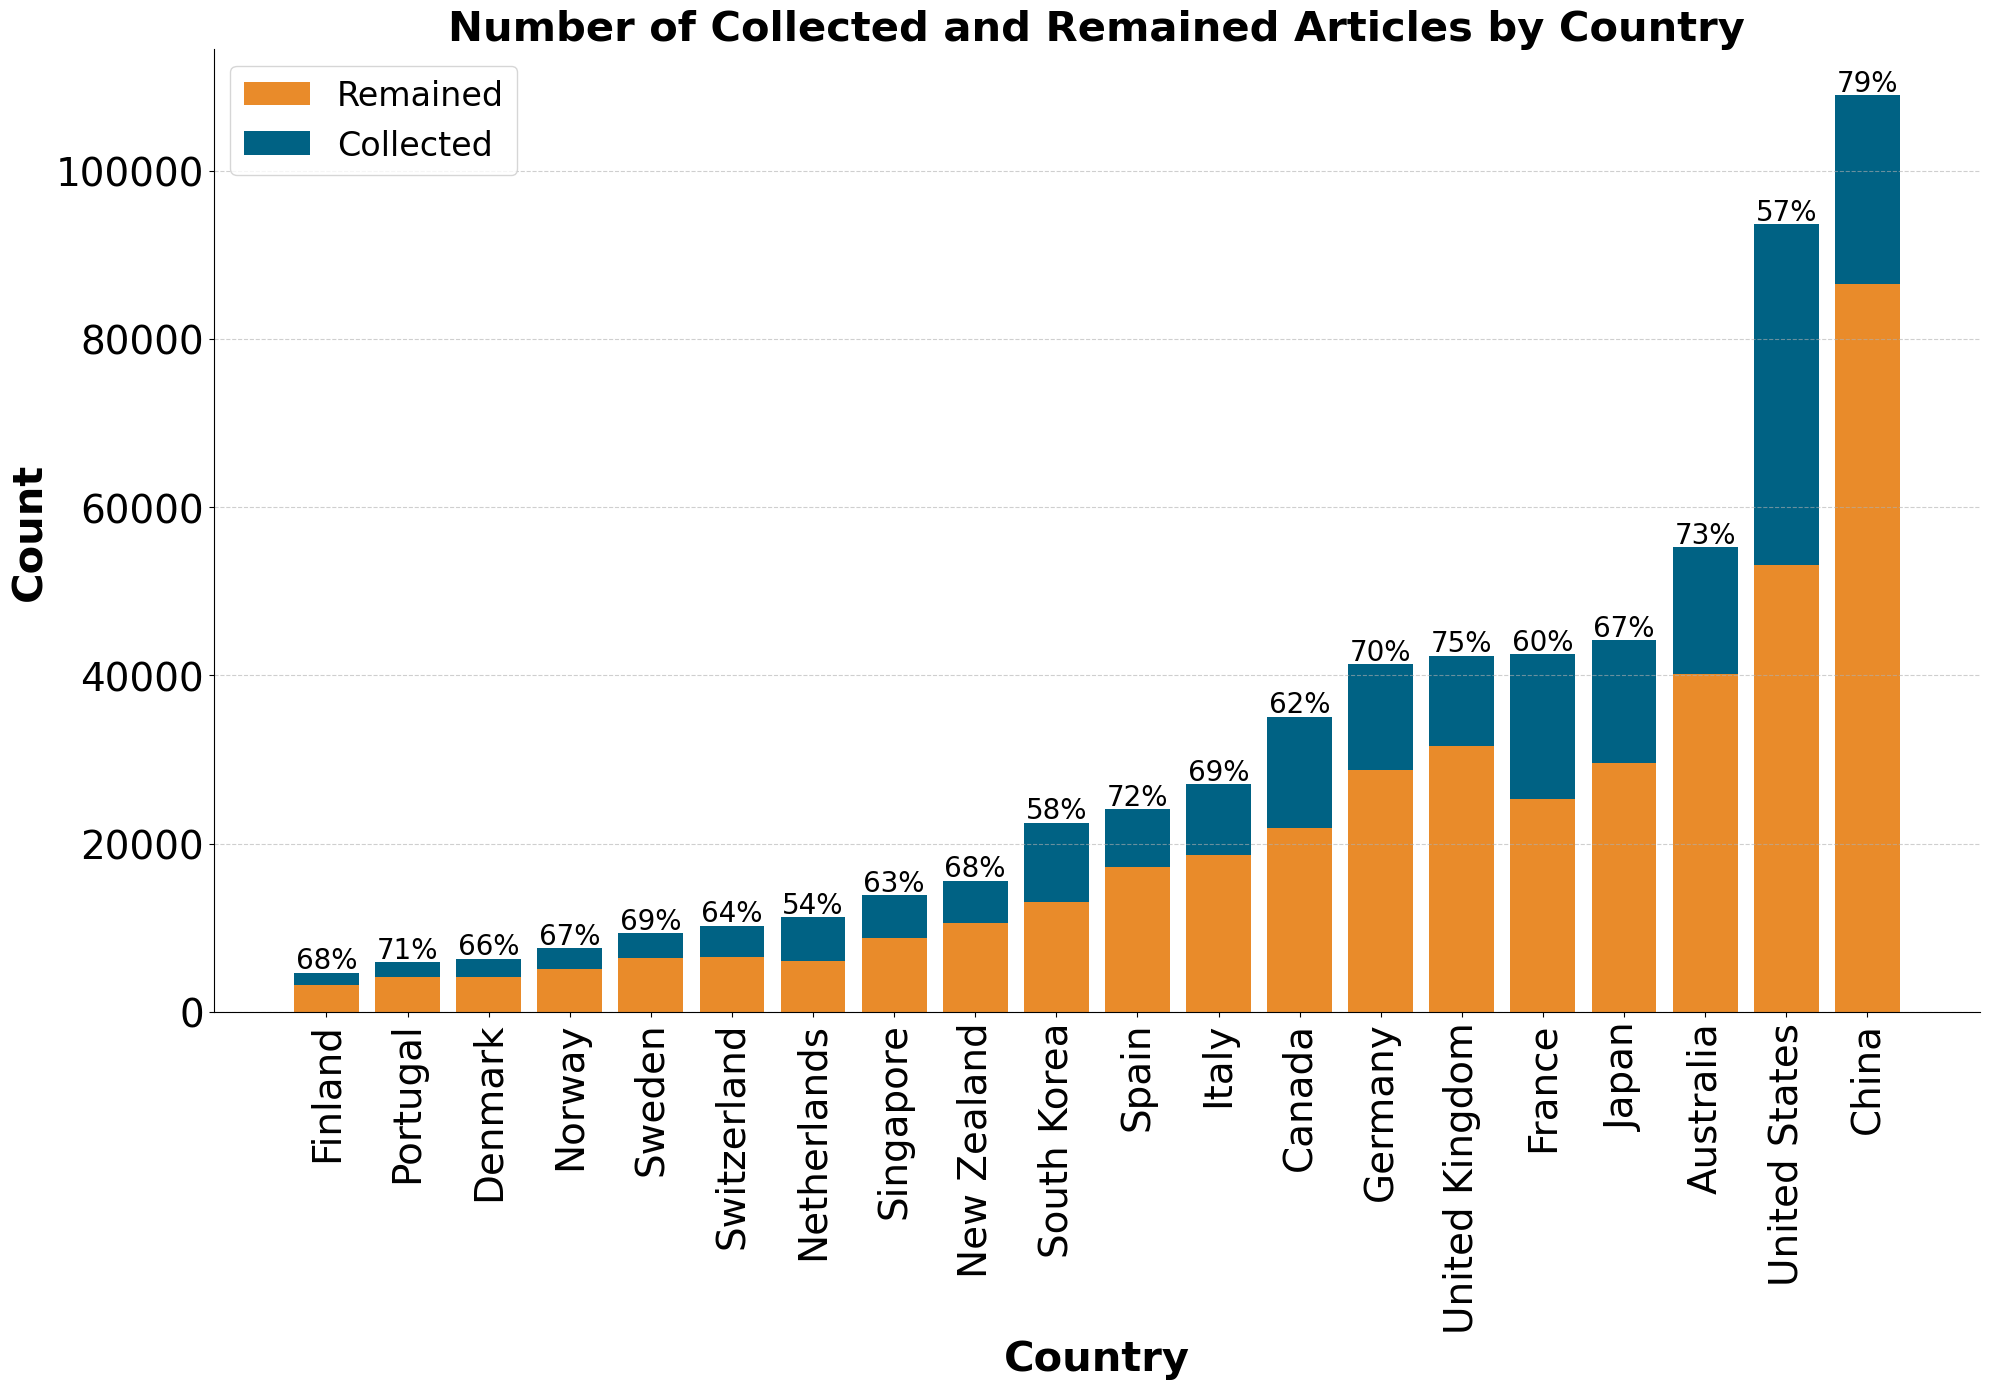

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
countries = ['Australia', 'Canada', 'China', 'Denmark', 'Finland', 'France', 'Germany', 'Italy', 'Japan',
             'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore', 'South Korea', 'Spain',
             'Sweden', 'Switzerland', 'United Kingdom', 'United States']
collected = [55269, 35100, 108997, 6333, 4677, 42489, 41345, 27067, 44227, 11260, 15606, 7623, 5895, 13917, 22503, 24087, 9372, 10264, 42365, 93632]
remained = [40178, 21832, 86560, 4157, 3191, 25326, 28778, 18695, 29598, 6057, 10626, 5119, 4183, 8784, 13063, 17286, 6420, 6524, 31582, 53093]
ratio = [73, 62, 79, 66, 68, 60, 70, 69, 67, 54, 68, 67, 71, 63, 58, 72, 69, 64, 75, 57]

# 排序数据
sorted_indices = np.argsort(collected)
sorted_countries = [countries[i] for i in sorted_indices]
sorted_collected = [collected[i] - remained[i] for i in sorted_indices]
sorted_remained = [remained[i] for i in sorted_indices]
sorted_ratio = [ratio[i] for i in sorted_indices]

# Calculate the ratio for each country
# ratios = [(r / (c + r)) * 100 for c, r in zip(sorted_collected, sorted_remained)]


# Plotting the data with corrected stacked bars
plt.figure(figsize=(20, 14))

# Bar plots
# First plot the 'remained' data as the bottom bars
p1 = plt.bar(sorted_countries, sorted_remained, color='#E98B2A', label='Remained')
# Then plot the 'collected' data on top of it
p2 = plt.bar(sorted_countries, sorted_collected, color='#006284', bottom=sorted_remained, label='Collected')

# Labels and title
plt.xlabel('Country', fontsize=30, fontweight='bold')
plt.ylabel('Count', fontsize=30, fontweight='bold')
# title 加粗
plt.title('Number of Collected and Remained Articles by Country', fontsize=30, fontweight='bold')
plt.xticks(rotation=90, fontsize=28)  # Rotate the labels for better visibility
plt.yticks(fontsize=28)

# Legend
plt.legend(fontsize=24)

# Text annotations on bars
for i, (c, r, ratio) in enumerate(zip(sorted_collected, sorted_remained, sorted_ratio)):
    plt.text(i, c + r + 500, f"{ratio:.0f}%", ha='center', fontsize=20)

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save the plot
plt.tight_layout()
corrected_output_path_eps = '../Data/Images/fig4-2.eps'
plt.savefig(corrected_output_path_eps)
plt.show()


